# DATATHON FME 2024 - MANGO CHALLENGE

## Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
from xgboost import XGBClassifier

## Load data

In [4]:
# Load merged dataset
data_path = "data/unique_products_with_attributes.csv" 
data = pd.read_csv(data_path)

## Explore data

In [21]:
data.head() # show the firsts 5 rows

,cod_modelo_color,cod_color,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,...,neck_lapel_type,woven_structure,knit_structure,heel_shape_type,length_type,sleeve_length_type,toecap_type,waist_type,closure_placement,cane_height_type
0,83_1124642,82,0,2,0,5,4,7,19,38,...,27,1,2,4,10,2,3,2,3,5
1,86_1215223,01,0,2,0,6,2,2,4,13,...,5,2,1,4,5,0,3,2,2,5
2,84_1167695,70,0,2,0,1,4,8,21,41,...,27,2,1,4,10,0,3,2,4,5
3,82_1108473,01,0,4,0,2,1,4,8,17,...,17,3,1,4,5,1,3,1,4,5
4,83_1137778,37,1,0,1,1,4,7,20,40,...,27,2,1,4,10,2,3,2,6,5


In [22]:
data.isnull().sum() # show null values. It can be seen that cod_color and des_color contain 67 null value, so we eliminate this 67 rows. 

cod_modelo_color                 0
cod_color                        0
des_sex                          0
des_age                          0
des_line                         0
des_fabric                       0
des_product_category             0
des_product_aggregated_family    0
des_product_family               0
des_product_type                 0
des_filename                     0
des_color                        0
silhouette_type                  0
neck_lapel_type                  0
woven_structure                  0
knit_structure                   0
heel_shape_type                  0
length_type                      0
sleeve_length_type               0
toecap_type                      0
waist_type                       0
closure_placement                0
cane_height_type                 0
dtype: int64


Frecuencias para la columna 'des_color':

     des_color  Frecuencia
0           76        5114
1           79        2753
2           75        1913
3           34        1666
4           13        1574
..         ...         ...
116         53           3
117         95           3
118         52           1
119        111           1
120          1           1

[121 rows x 2 columns]

Frecuencias de des_sex:
des_sex
0    23136
1     9853
2      387
Name: count, dtype: int64


C:\Users\Elena\AppData\Local\Temp\ipykernel_20224\934064797.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=col, order=data[col].value_counts().index, palette='viridis')


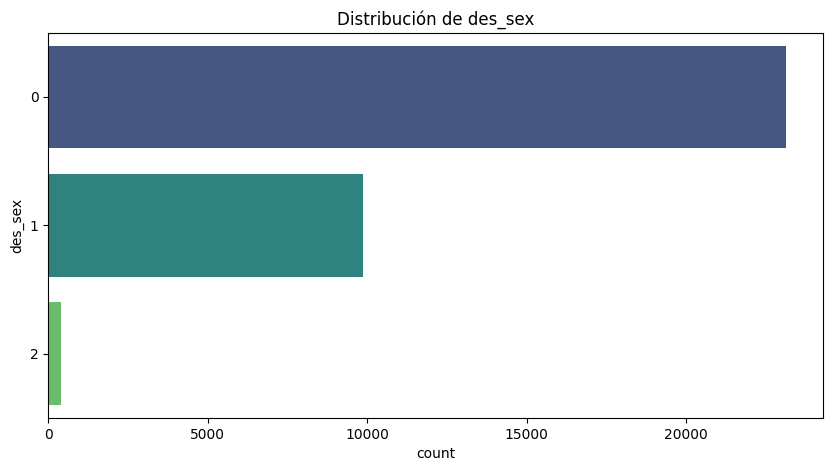


Frecuencias de des_age:
des_age
0    23069
2     5061
1     2639
4     2005
3      602
Name: count, dtype: int64


C:\Users\Elena\AppData\Local\Temp\ipykernel_20224\934064797.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=col, order=data[col].value_counts().index, palette='viridis')


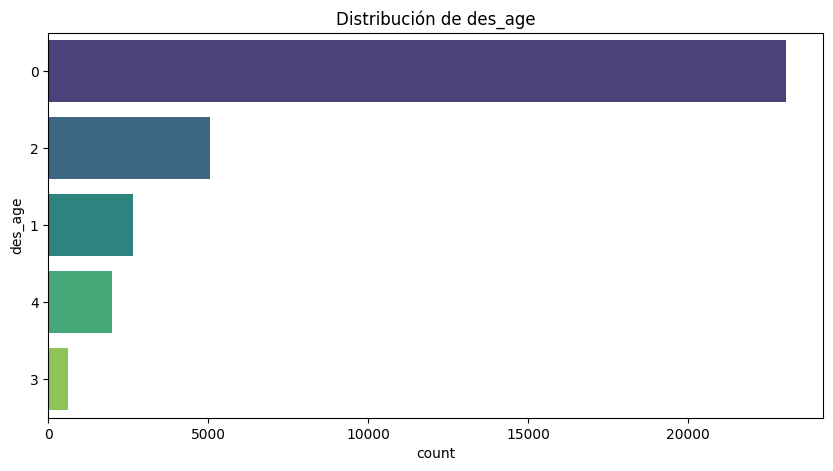


Frecuencias de des_line:
des_line
2    16925
0    10307
1     6144
Name: count, dtype: int64


C:\Users\Elena\AppData\Local\Temp\ipykernel_20224\934064797.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=col, order=data[col].value_counts().index, palette='viridis')


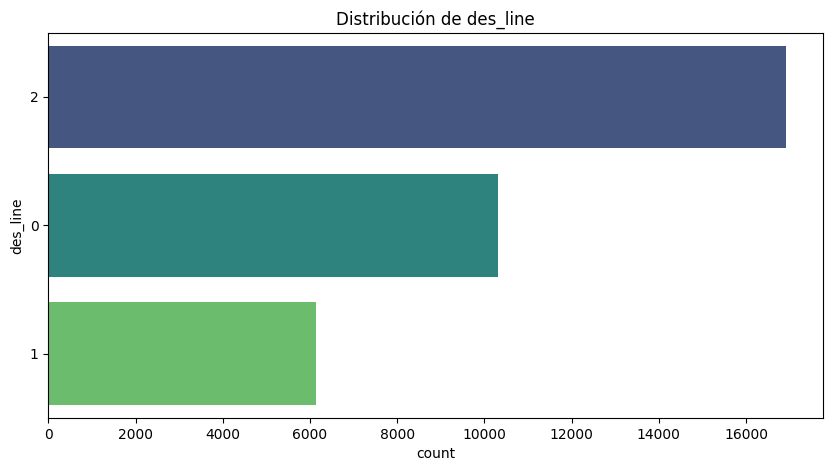


Frecuencias de des_fabric:
des_fabric
6    12825
1    10671
5     5006
2     3039
0     1294
4      367
3      174
Name: count, dtype: int64


C:\Users\Elena\AppData\Local\Temp\ipykernel_20224\934064797.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=col, order=data[col].value_counts().index, palette='viridis')


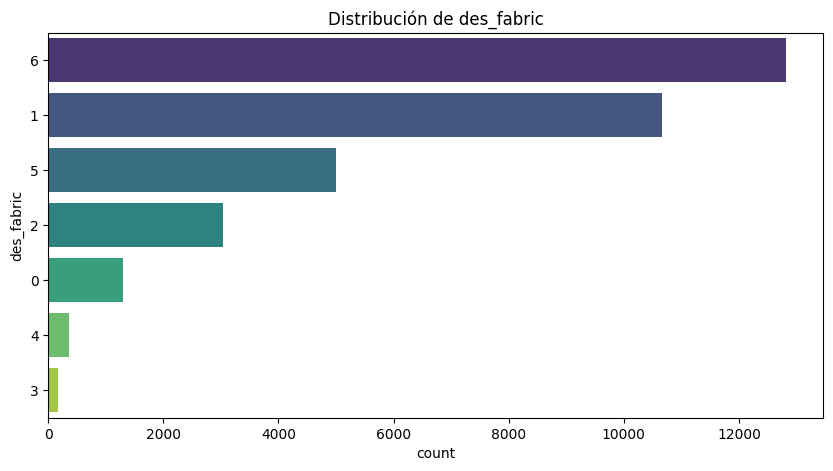


Frecuencias de des_product_category:
des_product_category
4    15860
1     7993
2     4622
3     3607
0     1294
Name: count, dtype: int64


C:\Users\Elena\AppData\Local\Temp\ipykernel_20224\934064797.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=col, order=data[col].value_counts().index, palette='viridis')


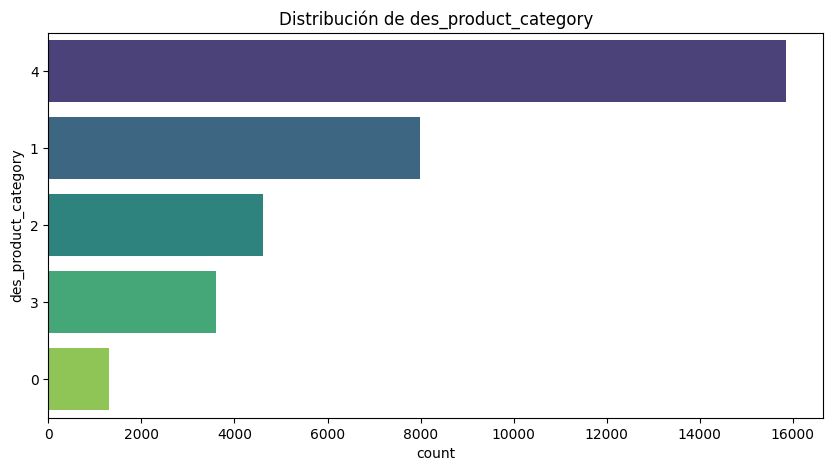


Frecuencias de des_product_aggregated_family:
des_product_aggregated_family
8     5981
7     5078
2     4622
10    3767
5     3694
6     2425
3     2219
4     1801
1     1388
0     1294
9     1107
Name: count, dtype: int64


C:\Users\Elena\AppData\Local\Temp\ipykernel_20224\934064797.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=col, order=data[col].value_counts().index, palette='viridis')


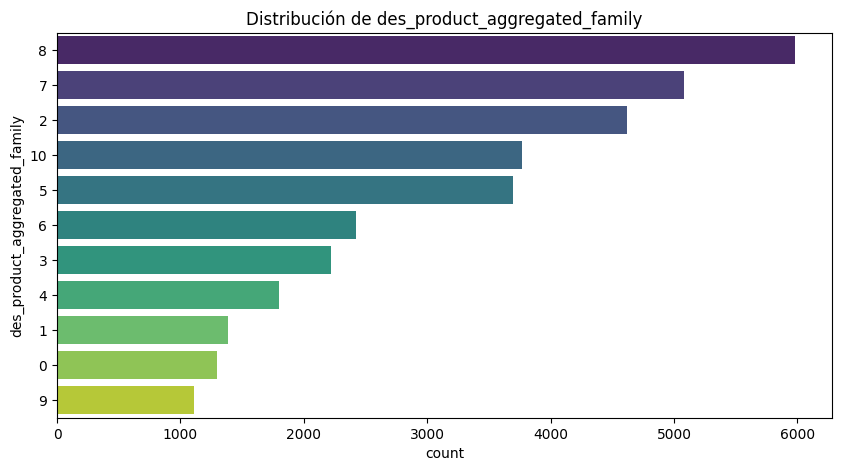


Frecuencias de des_product_family:
des_product_family
21    5374
4     3729
16    3694
24    2945
19    2585
8     1801
20    1537
17    1300
5     1212
18    1125
22    1107
7     1060
2      956
9      893
11     822
0      808
3      556
14     526
15     428
25     258
12     183
23     136
10      93
13      85
6       82
1       81
Name: count, dtype: int64


C:\Users\Elena\AppData\Local\Temp\ipykernel_20224\934064797.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=col, order=data[col].value_counts().index, palette='viridis')


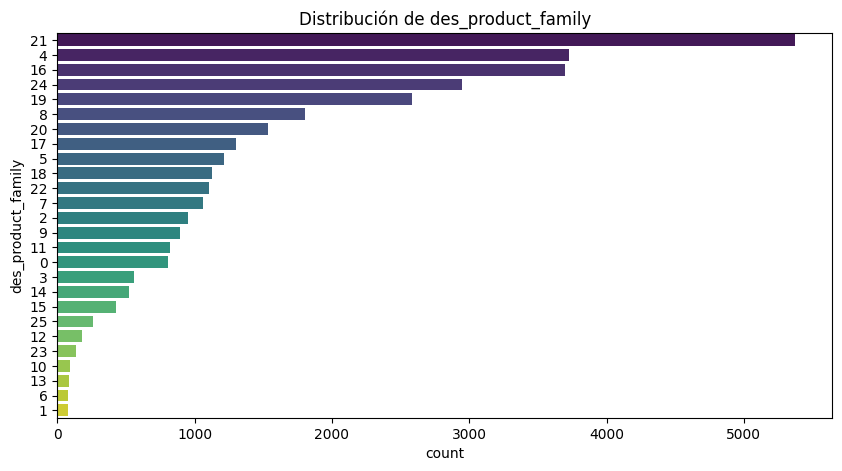


Frecuencias para la columna 'des_product_type':

    des_product_type  Frecuencia
0                 41        5374
1                 13        3678
2                 45        2945
3                 38        2530
4                 33        2503
5                 17        1801
6                 40        1537
7                  4        1191
8                 36        1125
9                 42        1107
10                15         952
11                 9         941
12                 3         808
13                35         738
14                19         635
15                 2         562
16                12         542
17                28         526
18                22         448
19                30         428
20                18         374
21                32         327
22                34         308
23                46         258
24                24         221
25                43         201
26                 0         200
27                23      

In [23]:
# Plot frecuencies of the categoric variables
cat_columns = ['des_color', 'des_sex', 'des_age', 'des_line', 
               'des_fabric', 'des_product_category', 'des_product_aggregated_family',
               'des_product_family', 'des_product_type']

for col in cat_columns:
    if col == 'des_color' or col=='des_product_type':
        print(f"\nFrecuencias para la columna '{col}':\n")
        # Crear tabla de frecuencias
        tabla_frecuencias = data[col].value_counts().reset_index()
        tabla_frecuencias.columns = [col, 'Frecuencia']  # Renombrar columnas
        print(tabla_frecuencias)
    
    else:
        print(f"\nFrecuencias de {col}:")
        print(data[col].value_counts())

        # Visualización de frecuencias
        plt.figure(figsize=(10, 5))
        sns.countplot(data=data, y=col, order=data[col].value_counts().index, palette='viridis')
        plt.title(f"Distribución de {col}")
        plt.show()

In [24]:
data.describe(include='all')

,cod_modelo_color,cod_color,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,...,neck_lapel_type,woven_structure,knit_structure,heel_shape_type,length_type,sleeve_length_type,toecap_type,waist_type,closure_placement,cane_height_type
count,33376,33376,33376.000000,33376.000000,33376.000000,33376.000000,33376.000000,33376.000000,33376.000000,33376.000000,...,33376.000000,33376.000000,33376.000000,33376.000000,33376.000000,33376.000000,33376.000000,33376.000000,33376.000000,33376.000000
unique,33376,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,82_1112588,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,5114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.318402,0.676744,1.198286,3.616940,2.741431,5.648969,14.406340,28.459342,...,17.617120,1.943912,1.427942,4.040898,6.668714,1.531310,2.997963,1.971776,3.339316,4.983851
std,NaN,NaN,0.490122,1.162400,0.881261,2.325444,1.361521,2.902817,7.409639,13.939317,...,8.278577,0.847486,1.210623,0.506946,3.148261,1.110539,0.252974,0.814870,1.959945,0.232382
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,7.000000,15.000000,...,13.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000,2.000000,2.000000,5.000000
50%,NaN,NaN,0.000000,0.000000,2.000000,5.000000,3.000000,6.000000,16.000000,33.000000,...,17.000000,2.000000,1.000000,4.000000,5.000000,1.000000,3.000000,2.000000,4.000000,5.000000
75%,NaN,NaN,1.000000,1.000000,2.000000,6.000000,4.000000,8.000000,21.000000,41.000000,...,26.000000,3.000000,1.000000,4.000000,10.000000,2.000000,3.000000,2.000000,4.000000,5.000000


In [25]:
# Unique predictive cols
target_col = 'des_value'
predictive_cols = ['silhouette_type', 'neck_lapel_type', 'woven_structure',
                   'knit_structure', 'heel_shape_type', 'length_type',
                   'sleeve_length_type', 'toecap_type', 'waist_type',
                   'closure_placement', 'cane_height_type']

for col in predictive_cols:
    unique_values = data[col].nunique()
    print(f"Cardinalidad de {col}: {unique_values}")

Cardinalidad de silhouette_type: 34
Cardinalidad de neck_lapel_type: 34
Cardinalidad de woven_structure: 5
Cardinalidad de knit_structure: 9
Cardinalidad de heel_shape_type: 12
Cardinalidad de length_type: 13
Cardinalidad de sleeve_length_type: 7
Cardinalidad de toecap_type: 5
Cardinalidad de waist_type: 5
Cardinalidad de closure_placement: 7
Cardinalidad de cane_height_type: 7


## Clean data

In [5]:
data = data.dropna() # remove nan values
# data.isnull().sum() # show the nan values

In [6]:
# Select all the features - 0.79
# features = ['des_color', 'des_sex', 'des_age', 'des_line', 'des_fabric', 'des_product_category', 'des_product_aggregated_family','des_product_family', 'des_product_type']

# selecte most important features - precison 0.8
features = ["des_sex", "des_age", "des_line", "des_fabric", "des_product_family", "des_product_type"]

unique_attributes = ['silhouette_type', 'neck_lapel_type', 'woven_structure',
       'knit_structure', 'heel_shape_type', 'length_type',
       'sleeve_length_type', 'toecap_type', 'waist_type',
       'closure_placement', 'cane_height_type']



In [7]:
# coding the categories for each categorical colum
mappings = {}
for col in features + unique_attributes:
    original_data = data[col]
    # print(original_data.value_counts())
    encoded_data = data[col].astype("category").cat.codes
    # print(encoded_data.value_counts())
    data[col] = encoded_data
    
    df_i = pd.DataFrame({
        'original': original_data.value_counts().index,
        'encoding': encoded_data.value_counts().index
        })
    print(col,df_i)
    mappings[col] = df_i
mappings
with open(f"pretrained_models/mappings.pkl","wb") as f:
        pickle.dump(mappings,f)

des_sex   original  encoding
0   Female         0
1     Male         1
2   Unisex         2
des_age   original  encoding
0    Adult         0
1     Kids         2
2     Baby         1
3     Teen         4
4  Newborn         3
des_line   original  encoding
0    WOMAN         2
1     KIDS         0
2      MAN         1
des_fabric             original  encoding
0              WOVEN         6
1           CIRCULAR         1
2             TRICOT         5
3              JEANS         2
4        ACCESSORIES         0
5  SYNTHETIC LEATHER         4
6            LEATHER         3
des_product_family                     original  encoding
0                    T-shirt        21
1                    Dresses         4
2                      Shirt        16
3                   Trousers        24
4                    Sweater        19
5                      Jeans         8
6                Sweatshirts        20
7                     Shorts        17
8                   Footwear         5
9            

## Train the model

In [8]:
# Split test and train models 
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [9]:
# Diccionario para almacenar modelos entrenados y sus resultados
models = {}
results = []
all_y_true = []  # Lista para almacenar todas las verdaderas etiquetas
all_y_pred = []  # Lista para almacenar todas las predicciones

# Entrenar un modelo Random Forest para cada attribute_name
for attribute in unique_attributes:
    print(f"Entrenando modelo para el atributo: {attribute}")

    # Separar características y etiquetas
    X_train = train_data[features]
    y_train = train_data[attribute]
    X_test = test_data[features]
    y_test = test_data[attribute]
    
    # Entrenar el modelo
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = rf.predict(X_test)

    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Precisión para {attribute}: {accuracy:.4f}")

    # Almacenar resultados y etiquetas
    models[attribute] = rf
    # save
    with open(f"pretrained_models/model_{attribute}.pkl","wb") as f:
        pickle.dump(rf,f)
    results.append(accuracy)
    all_y_true.extend(y_test)  # Guardamos las etiquetas verdaderas
    all_y_pred.extend(y_pred)  # Guardamos las predicciones

    # Map back to labels
    mapping_df = mappings[attribute]
    encoding_to_label = dict(zip(mapping_df['encoding'], mapping_df['original']))
    y_pred_labeled = [encoding_to_label[encoding] for encoding in y_pred]
    test_data[f"{attribute}_predicted"] = y_pred_labeled
    

# Calcular la precisión total (en función de todas las predicciones y etiquetas)
total_accuracy = accuracy_score(all_y_true, all_y_pred)
print(f"\nPrecisión total del modelo: {total_accuracy:.4f}")

Entrenando modelo para el atributo: silhouette_type
Precisión para silhouette_type: 0.5386
Entrenando modelo para el atributo: neck_lapel_type
Precisión para neck_lapel_type: 0.6329
Entrenando modelo para el atributo: woven_structure
Precisión para woven_structure: 0.7239
Entrenando modelo para el atributo: knit_structure
Precisión para knit_structure: 0.8978
Entrenando modelo para el atributo: heel_shape_type
Precisión para heel_shape_type: 0.9843
Entrenando modelo para el atributo: length_type
Precisión para length_type: 0.6531
Entrenando modelo para el atributo: sleeve_length_type
Precisión para sleeve_length_type: 0.7744
Entrenando modelo para el atributo: toecap_type
Precisión para toecap_type: 0.9865
Entrenando modelo para el atributo: waist_type
Precisión para waist_type: 0.8860
Entrenando modelo para el atributo: closure_placement
Precisión para closure_placement: 0.7898
Entrenando modelo para el atributo: cane_height_type
Precisión para cane_height_type: 0.9937

Precisión tota

## Test data

In [9]:
test_data[["length_type","length_type_predicted"]]

,length_type,length_type_predicted
32720,5,Standard
22246,10,Standard
843,4,INVALID
3662,3,Crop
23834,10,Standard
...,...,...
12734,3,Standard
16028,2,Corto
16244,10,Standard
31046,8,Largo


In [10]:
test_data["woven_structure"].value_counts()

woven_structure
2    2630
1    2330
3    1485
4     225
0       6
Name: count, dtype: int64

In [11]:
test_data["woven_structure_predicted"].value_counts()

woven_structure_predicted
Ligero      3330
INVALID     1659
Medio       1523
Pesado       159
Elástico       5
Name: count, dtype: int64

In [12]:
test_data.columns

Index(['cod_modelo_color', 'cod_color', 'des_sex', 'des_age', 'des_line',
       'des_fabric', 'des_product_category', 'des_product_aggregated_family',
       'des_product_family', 'des_product_type', 'des_filename', 'des_color',
       'silhouette_type', 'neck_lapel_type', 'woven_structure',
       'knit_structure', 'heel_shape_type', 'length_type',
       'sleeve_length_type', 'toecap_type', 'waist_type', 'closure_placement',
       'cane_height_type', 'silhouette_type_predicted',
       'neck_lapel_type_predicted', 'woven_structure_predicted',
       'knit_structure_predicted', 'heel_shape_type_predicted',
       'length_type_predicted', 'sleeve_length_type_predicted',
       'toecap_type_predicted', 'waist_type_predicted',
       'closure_placement_predicted', 'cane_height_type_predicted'],
      dtype='object')

# Inference
`["des_sex", "des_age", "des_line", "des_fabric", "des_product_family", "des_product_type"]`


In [47]:
data_path = "data/test_data.csv"
real_test_df = pd.read_csv(data_path)
real_test_df.head()

,cod_modelo_color,des_filename,cod_color,des_color,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,attribute_name,test_id
0,88_49711373,88_49711373_67080432-99_.jpg,99,NEGRO,Female,Adult,WOMAN,ACCESSORIES,"Accesories, Swim and Intimate",Accessories,Footwear,Boots,cane_height_type,88_49711373_cane_height_type
1,88_49718802,88_49718802_67030656-99_.jpg,99,NEGRO,Male,Adult,MAN,ACCESSORIES,"Accesories, Swim and Intimate",Accessories,Footwear,Ankle Boots,cane_height_type,88_49718802_cane_height_type
2,88_49709572,88_49709572_67030418-01_B.jpg,01,BLANCO,Female,Kids,KIDS,CIRCULAR,Tops,T-shirts,T-shirt,T-Shirt,cane_height_type,88_49709572_cane_height_type
3,88_49722701,88_49722701_67066002-02_.jpg,02,OFFWHITE,Female,Baby,KIDS,CIRCULAR,Tops,T-shirts,T-shirt,T-Shirt,cane_height_type,88_49722701_cane_height_type
4,88_49724926,88_49724926_67056330-02_B.jpg,02,OFFWHITE,Male,Newborn,KIDS,WOVEN,Tops,Shirts,Shirt,Shirt,cane_height_type,88_49724926_cane_height_type


In [48]:
def map_to_encoding(mappings,value):
    # print("value=",value,len(value))
    # print("mappings=",mappings)
    # a = input("mfkdl")
    if value in mappings:
        # print("return=",mappings[value])
        return mappings[value]
    else:
        # print("not found")
        return 999

In [49]:
for feature in features:
    # Encode using mappings
    mapping_df = mappings[feature]
    encoding_to_label = dict(zip(mapping_df['original'],mapping_df['encoding']))
    print(encoding_to_label)
    # y_pred_labeled = [encoding_to_label[encoding] for encoding in y_pred]
    # test_data[f"{attribute}_predicted"] = y_pred_labeled
    
    real_test_df[feature] = real_test_df[feature].apply(lambda x: map_to_encoding(encoding_to_label,x))

{'Female': 0, 'Male': 1, 'Unisex': 2}
{'Adult': 0, 'Kids': 2, 'Baby': 1, 'Teen': 4, 'Newborn': 3}
{'WOMAN': 2, 'KIDS': 0, 'MAN': 1}
{'WOVEN': 6, 'CIRCULAR': 1, 'TRICOT': 5, 'JEANS': 2, 'ACCESSORIES': 0, 'SYNTHETIC LEATHER': 4, 'LEATHER': 3}
{'T-shirt': 21, 'Dresses': 4, 'Shirt': 16, 'Trousers': 24, 'Sweater': 19, 'Jeans': 8, 'Sweatshirts': 20, 'Shorts': 17, 'Footwear': 5, 'Skirts': 18, 'Tops': 22, 'Jackets': 7, 'Cardigans': 2, 'Jumpsuit': 9, 'Leggings and joggers': 11, 'Blazers': 0, 'Coats': 3, 'Poloshirts': 14, 'Puffer coats': 15, 'Vest': 25, 'Outer Vest': 12, 'Trenchcoats': 23, 'Leather jackets': 10, 'Parkas': 13, 'Hats, scarves and gloves': 6, 'Bodysuits': 1}
{'T-Shirt': 41, 'Dress': 13, 'Trousers': 45, 'Sweater': 38, 'Shirt': 33, 'Jeans': 17, 'Sweatshirt': 40, 'Blouse': 4, 'Skirt': 36, 'Top': 42, 'Jacket': 15, 'Cardigan': 9, 'Blazer': 3, 'Shorts': 35, 'Jumpsuit': 19, 'Bermudas': 2, 'Coat': 12, 'Poloshirt': 28, 'Leggings': 22, 'Puffer coat': 30, 'Joggers': 18, 'Sandals': 32, 'Shoes'

In [33]:
real_test_df

,cod_modelo_color,des_filename,cod_color,des_color,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,attribute_name,test_id
0,88_49711373,88_49711373_67080432-99_.jpg,99,NEGRO,999,999,999,ACCESSORIES,999,999,Footwear,999,cane_height_type,88_49711373_cane_height_type
1,88_49718802,88_49718802_67030656-99_.jpg,99,NEGRO,999,999,999,ACCESSORIES,999,999,Footwear,999,cane_height_type,88_49718802_cane_height_type
2,88_49709572,88_49709572_67030418-01_B.jpg,01,BLANCO,999,999,999,CIRCULAR,999,999,T-shirt,999,cane_height_type,88_49709572_cane_height_type
3,88_49722701,88_49722701_67066002-02_.jpg,02,OFFWHITE,999,999,999,CIRCULAR,999,999,T-shirt,999,cane_height_type,88_49722701_cane_height_type
4,88_49724926,88_49724926_67056330-02_B.jpg,02,OFFWHITE,999,999,999,WOVEN,999,999,Shirt,999,cane_height_type,88_49724926_cane_height_type
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71814,88_49727540,88_49727540_67069223-56_.jpg,56,NAVY,999,999,999,WOVEN,999,999,Shirt,999,knit_structure,88_49727540_knit_structure
71815,88_49733648,88_49733648_67017145-56_.jpg,56,NAVY,999,999,999,CIRCULAR,999,999,Poloshirts,999,knit_structure,88_49733648_knit_structure
71816,88_49735572,88_49735572_67076755-81_.jpg,81,ROSA PASTEL,999,999,999,CIRCULAR,999,999,T-shirt,999,knit_structure,88_49735572_knit_structure
71817,88_49713624,88_49713624_67092528-70_.jpg,70,ROJO,999,999,999,WOVEN,999,999,Dresses,999,knit_structure,88_49713624_knit_structure


In [50]:
# Create a prediction column with noting
real_test_df["des_value"] = ["" for _ in range(len(real_test_df))]

In [51]:
for attribute in unique_attributes:
    # Columns
    x = real_test_df[features]
    
    # Rows
    x = x[real_test_df["attribute_name"]==attribute]
    
    # Predict
    rf = models[attribute]
    y = rf.predict(x)
    # print(y)

    # Back to labels
    mapping_df = mappings[attribute]
    encoding_to_label = dict(zip(mapping_df['encoding'], mapping_df['original']))

    # y_pred_labeled = [encoding_to_label[encoding] for encoding in y]
    y_pred_labeled = []
    for encoding in y:
        # print(attribute,encoding,type(encoding),encoding_to_label)
        val_i = encoding_to_label[int(encoding)]
        y_pred_labeled.append(val_i)

    indexes = real_test_df["attribute_name"]==attribute
    
    real_test_df.loc[indexes,"des_value"] = y_pred_labeled

In [36]:
real_test_df

,cod_modelo_color,des_filename,cod_color,des_color,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,attribute_name,test_id,des_value
0,88_49711373,88_49711373_67080432-99_.jpg,99,NEGRO,999,999,999,ACCESSORIES,999,999,Footwear,999,cane_height_type,88_49711373_cane_height_type,5
1,88_49718802,88_49718802_67030656-99_.jpg,99,NEGRO,999,999,999,ACCESSORIES,999,999,Footwear,999,cane_height_type,88_49718802_cane_height_type,5
2,88_49709572,88_49709572_67030418-01_B.jpg,01,BLANCO,999,999,999,CIRCULAR,999,999,T-shirt,999,cane_height_type,88_49709572_cane_height_type,5
3,88_49722701,88_49722701_67066002-02_.jpg,02,OFFWHITE,999,999,999,CIRCULAR,999,999,T-shirt,999,cane_height_type,88_49722701_cane_height_type,5
4,88_49724926,88_49724926_67056330-02_B.jpg,02,OFFWHITE,999,999,999,WOVEN,999,999,Shirt,999,cane_height_type,88_49724926_cane_height_type,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71814,88_49727540,88_49727540_67069223-56_.jpg,56,NAVY,999,999,999,WOVEN,999,999,Shirt,999,knit_structure,88_49727540_knit_structure,1
71815,88_49733648,88_49733648_67017145-56_.jpg,56,NAVY,999,999,999,CIRCULAR,999,999,Poloshirts,999,knit_structure,88_49733648_knit_structure,1
71816,88_49735572,88_49735572_67076755-81_.jpg,81,ROSA PASTEL,999,999,999,CIRCULAR,999,999,T-shirt,999,knit_structure,88_49735572_knit_structure,1
71817,88_49713624,88_49713624_67092528-70_.jpg,70,ROJO,999,999,999,WOVEN,999,999,Dresses,999,knit_structure,88_49713624_knit_structure,1


In [52]:
real_test_df[["test_id","des_value"]].to_csv("test1.csv",index=False)